In [18]:
from __future__ import print_function
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')

In [19]:
PATH = 'Fertilizer Prediction.csv'
df = pd.read_csv(PATH)

In [20]:
df.head()

,N,P,K,Temparature,Humidity,Fertilizer Name
0,7,9,30,34,65,14-35-14
1,9,7,30,29,58,14-35-14
2,10,13,14,31,62,17-17-17
3,39,0,0,28,54,Urea
4,36,0,0,28,54,Urea


In [21]:
df.tail()

,N,P,K,Temparature,Humidity,Fertilizer Name
94,22,0,21,30,60,28-28
95,41,0,0,30,60,Urea
96,21,0,28,31,62,28-28
97,9,10,30,28,54,14-35-14
98,15,0,41,36,60,DAP


In [22]:
df.size

594

In [23]:
df.shape

(99, 6)

In [24]:
df.columns

Index(['N', 'P', 'K', 'Temparature', 'Humidity ', 'Fertilizer Name'], dtype='object')

In [25]:
df['Fertilizer Name'].unique()

array(['14-35-14', '17-17-17', 'Urea', 'DAP', '20-20', '28-28',
       '10-26-26'], dtype=object)

In [26]:
df.dtypes

N                   int64
P                   int64
K                   int64
Temparature         int64
Humidity            int64
Fertilizer Name    object
dtype: object

In [27]:
df['Fertilizer Name'].value_counts()

Fertilizer Name
Urea        22
DAP         18
28-28       17
14-35-14    14
20-20       14
17-17-17     7
10-26-26     7
Name: count, dtype: int64

<Axes: >

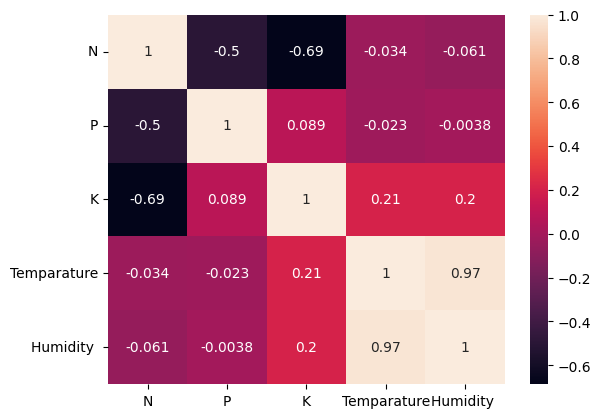

In [28]:
features = df[['N', 'P', 'K', 'Temparature', 'Humidity ']]
sns.heatmap(features.corr(),annot=True)

In [32]:
features = df[['N', 'P', 'K', 'Temparature', 'Humidity ']]
target = df['Fertilizer Name']
labels = df['Fertilizer Name']

In [33]:
acc = []
model = []

In [34]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(features,target,test_size = 0.2,random_state =2)

In [35]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

NaiveBayes = GaussianNB()

NaiveBayes.fit(Xtrain,Ytrain)

predicted_values = NaiveBayes.predict(Xtest)
x = metrics.accuracy_score(Ytest, predicted_values)
acc.append(x)
model.append('Naive Bayes')
print("Naive Bayes's Accuracy is: ", x)

print(classification_report(Ytest,predicted_values))

Naive Bayes's Accuracy is:  1.0
              precision    recall  f1-score   support

    10-26-26       1.00      1.00      1.00         1
    14-35-14       1.00      1.00      1.00         1
    17-17-17       1.00      1.00      1.00         1
       20-20       1.00      1.00      1.00         8
       28-28       1.00      1.00      1.00         2
         DAP       1.00      1.00      1.00         2
        Urea       1.00      1.00      1.00         5

    accuracy                           1.00        20
   macro avg       1.00      1.00      1.00        20
weighted avg       1.00      1.00      1.00        20



In [36]:
# Cross validation score (NaiveBayes)
score = cross_val_score(NaiveBayes,features,target,cv=5)
score

array([1.  , 1.  , 0.95, 1.  , 1.  ])

In [38]:
import pickle
# Dump the trained Naive Bayes classifier with Pickle
NB_pkl_filename = 'Fertilizer_Classifier.pkl'
# Open the file to save as pkl file
NB_Model_pkl = open(NB_pkl_filename, 'wb')
pickle.dump(NaiveBayes, NB_Model_pkl)
# Close the pickle instances
NB_Model_pkl.close()

In [39]:
data = np.array([[39,0,0,28,54]])
prediction = NaiveBayes.predict(data)
print(prediction)

['Urea']
